In [1]:
import sys
sys.path.append("/home/ajag/tcdona3")
import math
from tcdona2.polatis import Polatis
from monitor import RoadmMonitor
from ila import ILA
from bbsource import BBS
import time     
import json
from utils import *
from teraflex import tflex

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-dckffa5n because the default path (/home/ajag/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
pol = Polatis()
pol.login()

tf = tflex('10.10.10.92')

monitors = [RoadmMonitor('lumentum_4'), RoadmMonitor('lumentum_3'), RoadmMonitor('lumentum_7'), RoadmMonitor('lumentum_9'), RoadmMonitor('lumentum_8'), RoadmMonitor('lumentum_6'), RoadmMonitor('lumentum_5')]
monitor4 = monitors[0]
monitor3 = monitors[1]
monitor7 = monitors[2]
monitor9 = monitors[3]
monitor8 = monitors[4]
monitor6 = monitors[5]
monitor5 = monitors[6]

roadms = [monitor.roadm for monitor in monitors]
roadm4 = roadms[0]
roadm3 = roadms[1]
roadm7 = roadms[2]
roadm9 = roadms[3]
roadm8 = roadms[4]
roadm6 = roadms[5]
roadm5 = roadms[6]

operator_roadms = [roadm3, roadm7, roadm8, roadm9, roadm6, roadm5]
user_roadm = roadm4

Initializing ROADM Monitoring for lumentum_4...
Initializing ROADM Monitoring for lumentum_3...
Initializing ROADM Monitoring for lumentum_7...
Initializing ROADM Monitoring for lumentum_9...
Initializing ROADM Monitoring for lumentum_8...
Initializing ROADM Monitoring for lumentum_6...
Initializing ROADM Monitoring for lumentum_5...


In [3]:
test1_patch_list = [
('tf_1', 'roadm_4_p1'), 
('tf_2', 'roadm_4_p2'), 
('tf_3', 'roadm_4_p3'), 

('roadm_4_line', 'fiber_temp_100m'), 
('fiber_temp_100m', 'roadm_3_line'), 

('roadm_3_p1', 'fiber_7_510m') ,
('fiber_7_510m', 'roadm_7_line'),

('roadm_7_p1', 'roadm_7_p1'),

('roadm_7_line', 'fiber_19_12646m'),
('fiber_19_12646m', 'roadm_8_line'),

('roadm_8_p1', 'roadm_8_p1'),

('roadm_8_line', 'fiber_18_25220m'),
('fiber_18_25220m', 'roadm_9_line'),

('roadm_9_p1', 'roadm_9_p1'),

('roadm_9_line', 'fiber_22_25332m'),
('fiber_22_25332m', 'roadm_6_line'),

('roadm_6_p1', 'roadm_6_p1'),

('roadm_6_line', 'fiber_17_665m'),
('fiber_17_665m', 'fiber_p1b_394m'),
('fiber_p1b_394m', 'roadm_5_line'),

('roadm_5_p1', 'roadm_5_p1'),

('roadm_5_line', 'fiber_15_11895m'),
('fiber_15_11895m', 'roadm_3_p1'),

('roadm_3_line', 'fiber_temp_268m'), 
('fiber_temp_268m', 'roadm_4_line'), 

('roadm_4_p1', 'tf_1'),
('roadm_4_p2', 'tf_2'), 
('roadm_4_p3', 'tf_3'), 

# ('roadm_4_p4', 'PH-AROF-1'), ## need to add 2 # disabling this for now
]

In [4]:
pol.print_patch_table(patch_list=test1_patch_list)

#	Component	I/O	Port	Power (dBm)
0	tf_1	Out	1	-0.25
1	roadm_4_p1	In	427	-1.88
2	tf_2	Out	2	0.09
3	roadm_4_p2	In	433	-1.74
4	tf_3	Out	3	-0.06
5	roadm_4_p3	In	434	-1.62
6	roadm_4_line	Out	214	4.06
7	fiber_temp_100m	In	401	2.68
8	fiber_temp_100m	Out	81	2.25
9	roadm_3_line	In	535	0.74
10	roadm_3_p1	Out	106	2.59
11	fiber_7_510m	In	359	1.19
12	fiber_7_510m	Out	39	0.35
13	roadm_7_line	In	531	-1.36
14	roadm_7_p1	Out	110	-2.81
15	roadm_7_p1	In	430	-4.01
16	roadm_7_line	Out	211	-2.53
17	fiber_19_12646m	In	375	-3.85
18	fiber_19_12646m	Out	55	-7.11
19	roadm_8_line	In	530	-8.71
20	roadm_8_p1	Out	111	-7.07
21	roadm_8_p1	In	431	-8.55
22	roadm_8_line	Out	210	-6.7
23	fiber_18_25220m	In	374	-8.1
24	fiber_18_25220m	Out	54	-14.65
25	roadm_9_line	In	529	-16.17
26	roadm_9_p1	Out	112	-13.97
27	roadm_9_p1	In	432	-15.43
28	roadm_9_line	Out	209	-10.44
29	fiber_22_25332m	In	378	-12.18
30	fiber_22_25332m	Out	58	-18.57
31	roadm_6_line	In	532	-20.15
32	roadm_6_p1	Out	109	-15.77
33	roadm_6_p1	In	429	-17.04
34	roadm_

lumentum_4
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 12:14:49.792503


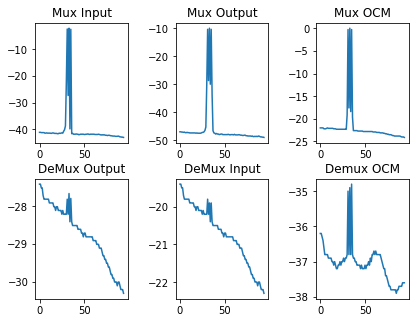

lumentum_3
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 12:14:55.134598


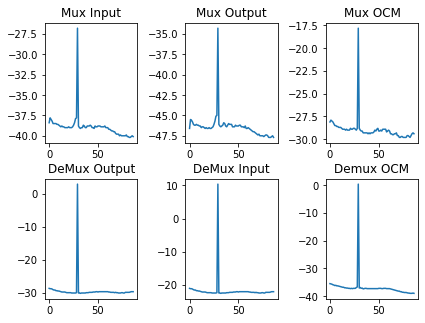

lumentum_7
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 12:15:00.426610


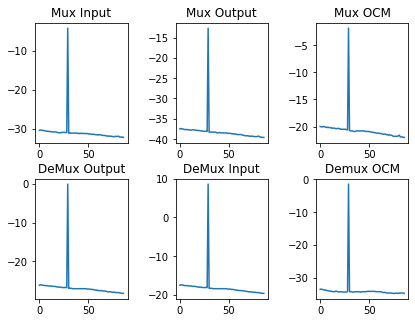

lumentum_9
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 12:15:05.468760


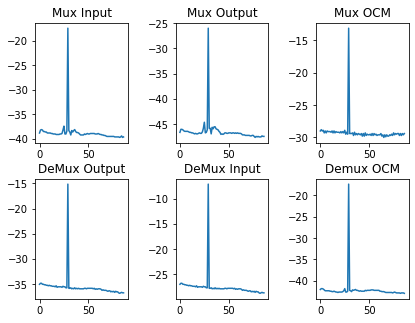

lumentum_8
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 12:15:10.643675


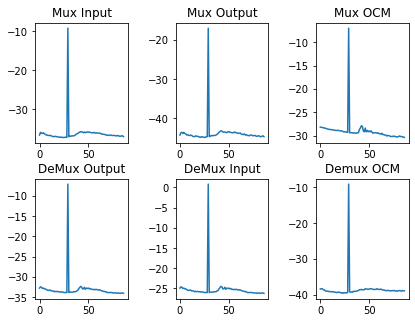

lumentum_6
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 12:15:15.894311


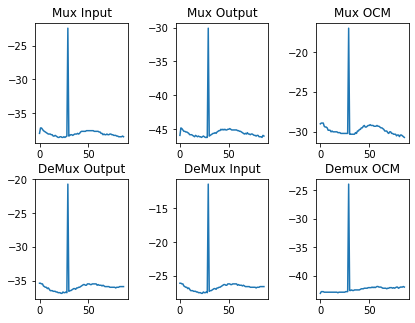

lumentum_5
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 12:15:21.099064


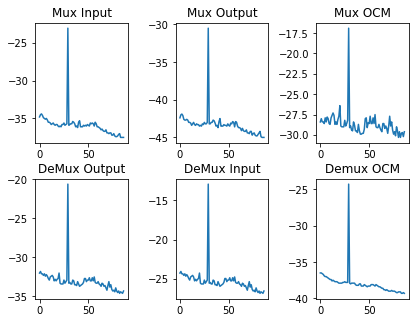

In [5]:
for monitor in monitors:
    print(monitor.device_name)
    monitor.plot_power('all', refresh=True, notebook=True)